In [52]:
import pyart
from matplotlib import pyplot as plt
import matplotlib
from netCDF4 import num2date, date2num
import numpy as np
from time import time
%matplotlib inline

In [46]:
def do_grid_map_gates_to_grid(radar):
    grids = pyart.map.grid_from_radars(
         radar, grid_shape=(17, 541, 541),
        grid_limits=((0, 17000.0),(-500000, 500000), (-500000, 500000)),
        fields=['reflectivity'], gridding_algo="map_gates_to_grid",
        weighting_function='BARNES')
    return grids

In [50]:
filenames = ['/data/ok_rain/temp/level2/raw/KVNX/KVNX_20150513_1939',
            '/data/ok_rain/temp/level2/raw/KICT/KICT_20150513_1937',
            '/data/ok_rain/temp/level2/raw/KTLX/KTLX_20150513_1935',
            '/data/ok_rain/temp/level2/raw/KFDR/KFDR_20150513_1939',
            '/data/ok_rain/temp/level2/raw/KDDC/KDDC_20150513_1940',
            '/data/ok_rain/temp/level2/raw/KEMX/KEMX_20150513_1932',
            '/data/ok_rain/temp/level2/raw/KLBB/KLBB_20150513_1939']

radars = [pyart.io.read(filename) for filename in filenames]


In [53]:
t1 = time()
grid = do_grid_map_gates_to_grid(radars)
print time() - t1

22.7228500843


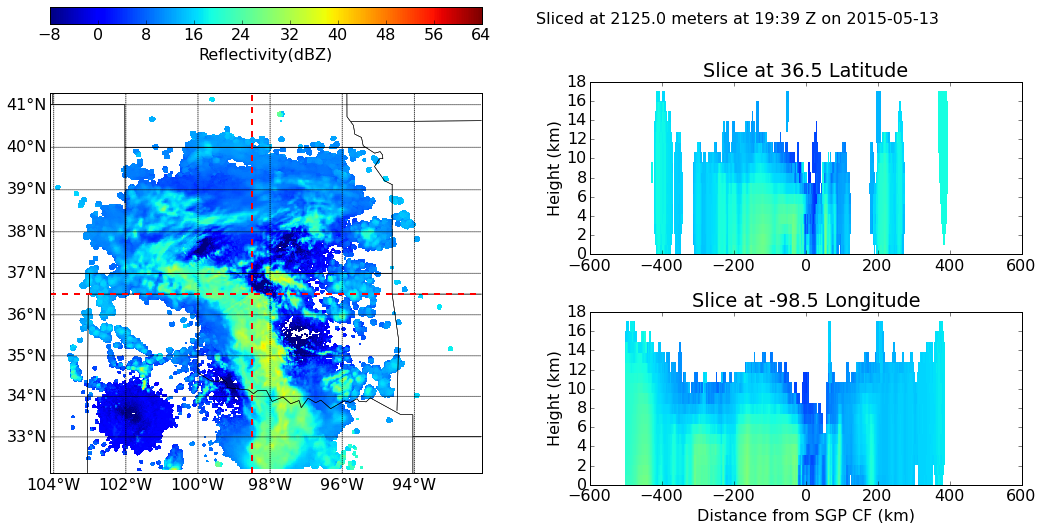

In [60]:
display = pyart.graph.GridMapDisplay(grid)

# create the figure
font = {'size': 16}
matplotlib.rc('font', **font)
fig = plt.figure(figsize=[15, 8])

# panel sizes
map_panel_axes = [0.05, 0.05, .4, .80]
x_cut_panel_axes = [0.55, 0.10, .4, .30]
y_cut_panel_axes = [0.55, 0.50, .4, .30]
colorbar_panel_axes = [0.05, 0.90, .4, .03]

# parameters
level = 2
vmin = -8
vmax = 64
lat = 36.5
lon = -98.5

# panel 1, basemap, radar reflectivity and NARR overlay
ax1 = fig.add_axes(map_panel_axes)
display.plot_basemap(lon_lines = np.arange(-104, -93, 2) )
display.plot_grid('reflectivity', level=level, vmin=vmin, vmax=vmax)
display.plot_crosshairs(lon=lon, lat=lat)

# plot the reanalysis on the basemap
# colorbar
cbax = fig.add_axes(colorbar_panel_axes)
display.plot_colorbar(cax=cbax)

# panel 2, longitude slice.
ax2 = fig.add_axes(x_cut_panel_axes)
display.plot_longitude_slice('reflectivity', lon=lon, lat=lat)
ax2.set_xlabel('Distance from SGP CF (km)')

# panel 3, latitude slice
ax3 = fig.add_axes(y_cut_panel_axes)
display.plot_latitude_slice('reflectivity', lon=lon, lat=lat)

# add a title
slc_height = grid.axes['z_disp']['data'][level]
dts = num2date(grid.axes['time']['data'], grid.axes['time']['units'])
datestr = dts[0].strftime('%H:%M Z on %Y-%m-%d')
title = 'Sliced at ' + str(slc_height) + ' meters at ' + datestr
fig.text(0.5, 0.9, title)
plt.show()



In [57]:
display.plot_grid?